# Business Understanding


In [1]:
## 1. Importing library

In [2]:
# importing numpy, pandas, matplotlib & seaborn (for advanced plots).
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns



# Importing lib for the ML algo.
import sklearn

# Scalers
from sklearn.preprocessing import StandardScaler

# Importing the Kmeans & related lib for finding the optimal k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing the Hierarchy for the linkage algo
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan



## 1.1 setting up required parameters

In [3]:
# to make graphs display inline
%matplotlib inline

# setting it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

# setting it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

# setting it to display max of 50 columns
pd.set_option('display.max_columns', 50) 

# setting it to display max of 100 rows
pd.set_option('display.max_rows', 100) 

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# setting styles for seaborn
sns.set(style="ticks", color_codes=True)


## 2. Data Sourcing

In [4]:
file_path ="C:\Data\Country-data.csv"
ngo = pd.read_csv(file_path)


## 2.1 Reading data

In [5]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [6]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [7]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 3. Data Cleaning

In [8]:
# calculating the row null % in the dataframe
print(round(100*ngo.isnull().sum(axis=1)/len(ngo), 2))



0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
162   0.0000
163   0.0000
164   0.0000
165   0.0000
166   0.0000
Length: 167, dtype: float64


In [9]:

#checking if any columns having unique value ie only 1 value
unique =ngo.nunique()
unique = unique[unique.values ==1] 
unique


Series([], dtype: int64)

## 4. Checking for outlliers

In [10]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


## 5. Exploratory Data Analysis

### 5.1 Univertiate analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x249ddb989a0>,
 'caps': [<matplotlib.lines.Line2D at 0x249ddbaf0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ddb98640>],
 'medians': [<matplotlib.lines.Line2D at 0x249ddbaf760>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ddbafa60>],
 'means': []}

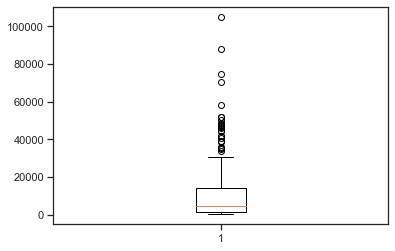

In [11]:

plt.boxplot(ngo.gdpp)


{'whiskers': [<matplotlib.lines.Line2D at 0x249ddc3c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x249ddc3cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ddc3c190>],
 'medians': [<matplotlib.lines.Line2D at 0x249ddc472b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ddc475b0>],
 'means': []}

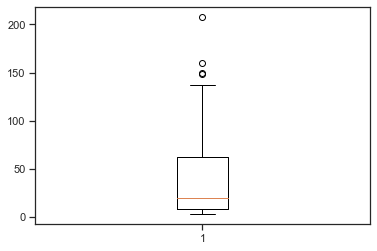

In [12]:
plt.boxplot(ngo.child_mort)



{'whiskers': [<matplotlib.lines.Line2D at 0x249ddc8f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x249ddc8ffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ddc8f580>],
 'medians': [<matplotlib.lines.Line2D at 0x249ddc9c6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ddc9c9a0>],
 'means': []}

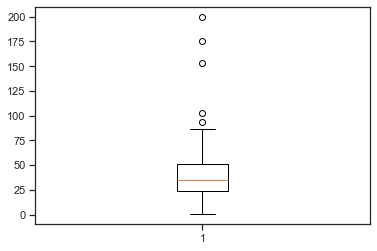

In [13]:
plt.boxplot(ngo.exports)

{'whiskers': [<matplotlib.lines.Line2D at 0x249ddcfc520>,
 'caps': [<matplotlib.lines.Line2D at 0x249ddcfcbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ddcfc1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x249ddd052e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ddd055e0>],
 'means': []}

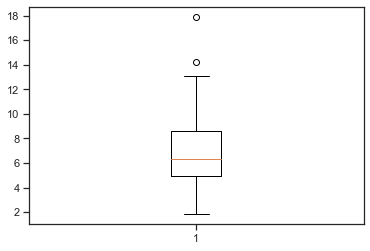

In [14]:
plt.boxplot(ngo.health)

{'whiskers': [<matplotlib.lines.Line2D at 0x249ddd51c10>,
 'caps': [<matplotlib.lines.Line2D at 0x249ddd5e310>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ddd518b0>],
 'medians': [<matplotlib.lines.Line2D at 0x249ddd5e9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ddd5ecd0>],
 'means': []}

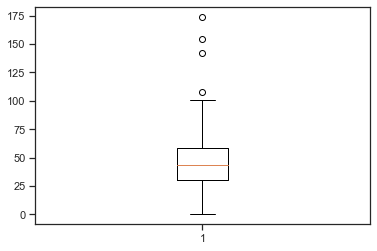

In [15]:
plt.boxplot(ngo.imports)

{'whiskers': [<matplotlib.lines.Line2D at 0x249dddadc40>,
 'caps': [<matplotlib.lines.Line2D at 0x249dddb9370>,
 'boxes': [<matplotlib.lines.Line2D at 0x249dddad8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x249dddb9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x249dddb9d30>],
 'means': []}

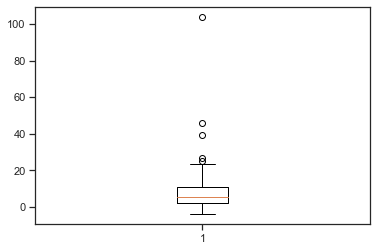

In [16]:
plt.boxplot(ngo.inflation)

{'whiskers': [<matplotlib.lines.Line2D at 0x249dde10160>,
 'caps': [<matplotlib.lines.Line2D at 0x249dde10820>,
 'boxes': [<matplotlib.lines.Line2D at 0x249dddffdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x249dde10ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249dde1a220>],
 'means': []}

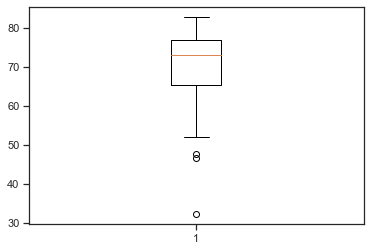

In [17]:
plt.boxplot(ngo.life_expec)

{'whiskers': [<matplotlib.lines.Line2D at 0x249dde655e0>,
 'caps': [<matplotlib.lines.Line2D at 0x249dde65ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249dde65280>],
 'medians': [<matplotlib.lines.Line2D at 0x249dde703a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249dde706a0>],
 'means': []}

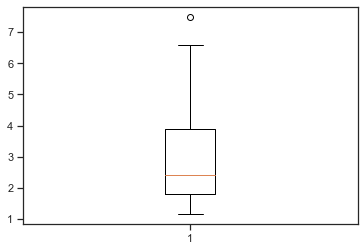

In [18]:
plt.boxplot(ngo.total_fer)

#### We see that gdpp, income and inflation column has high outliers. However let's not remove outliers frominflation as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).


## 6.Capping

In [19]:
# Capping the upper outlier values for the below columns.

q4 = ngo['income'].quantile(0.95)
ngo['income'][ngo['income']>= q4] = q4


q4 = ngo['inflation'].quantile(0.97)
ngo['inflation'][ngo['inflation']>= q4] = q4


q4 = ngo['total_fer'].quantile(0.97)
ngo['total_fer'][ngo['total_fer']>= q4] = q4


q4 = ngo['exports'].quantile(0.97)
ngo['exports'][ngo['exports']>= q4] = q4


q4 = ngo['health'].quantile(0.97)
ngo['health'][ngo['health']>= q4] = q4


q4 = ngo['imports'].quantile(0.97)
ngo['imports'][ngo['imports']>= q4] = q4



In [20]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,39.3748,6.7559,45.6018,15738.7605,7.0491,70.5557,2.9343,12964.1557
std,40.3289,20.8957,2.5831,19.6663,14787.1542,6.6645,8.8932,1.4799,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,87.0380,11.8020,92.7680,48290.0000,23.6260,82.8000,6.2306,105000.0000


#### We can see that all outliers are been handled just by fixing gdp column

## 7. Vishualising the relationship among variables

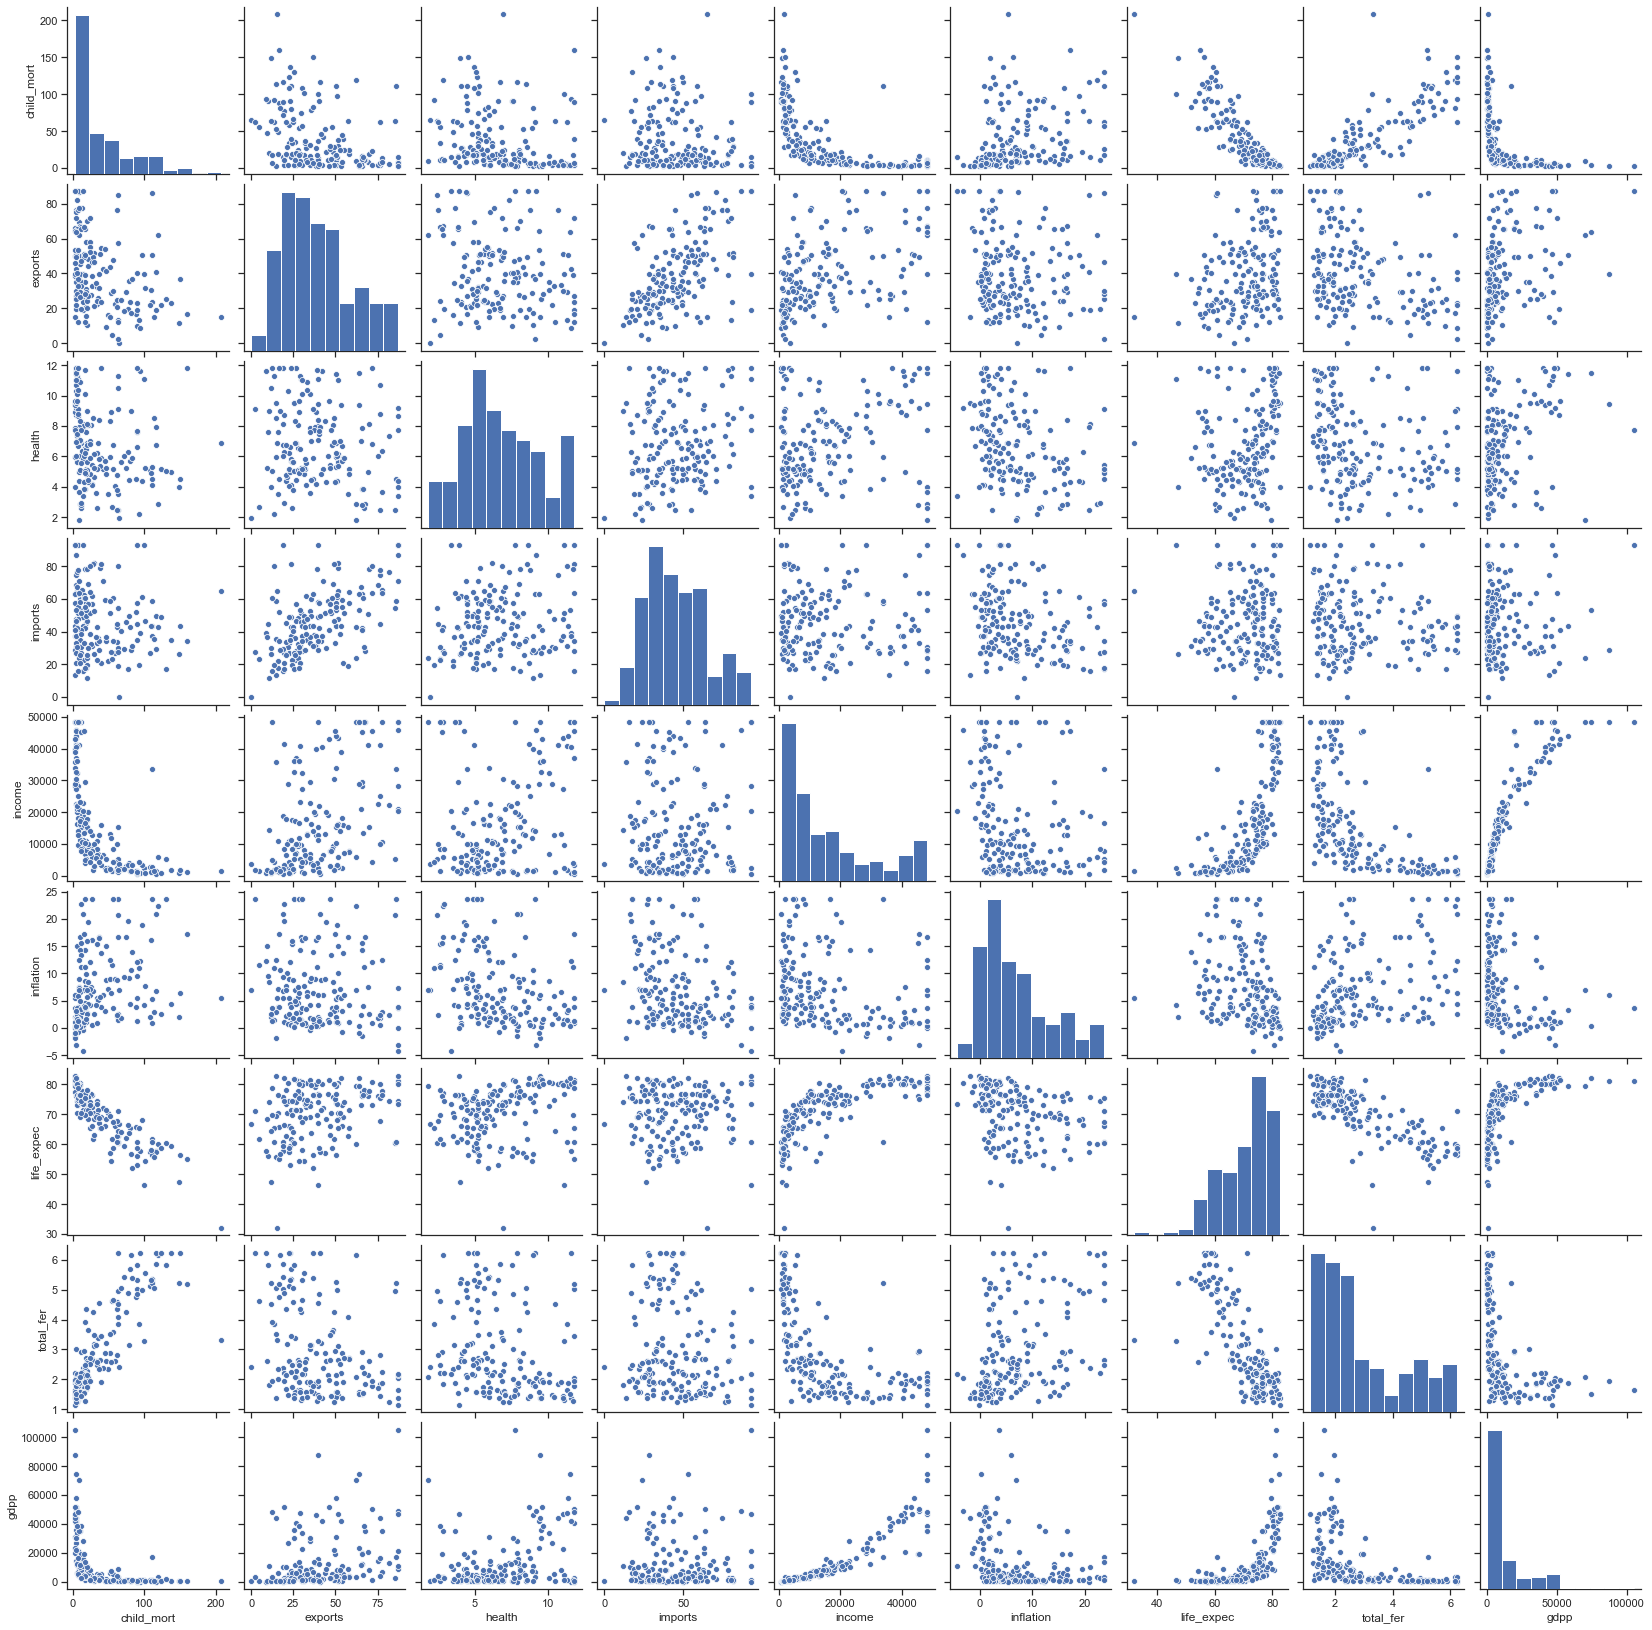

In [21]:
sns.pairplot(ngo)

## Bivariate Analysis

In [22]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200


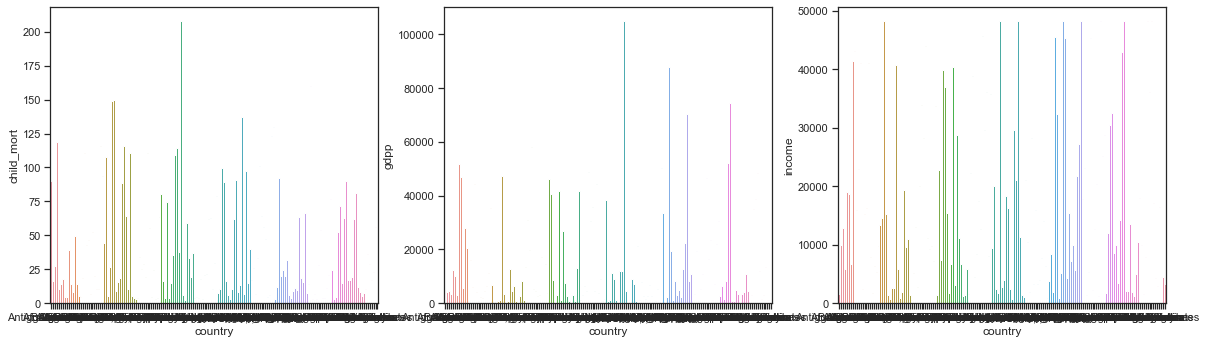

In [23]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.barplot(x = 'country', y = 'child_mort', data = ngo)

plt.subplot(2,3,2)
sns.barplot(x = 'country', y = 'gdpp', data = ngo)

plt.subplot(2,3,3)
sns.barplot(x = 'country', y = 'income', data = ngo)



plt.show()


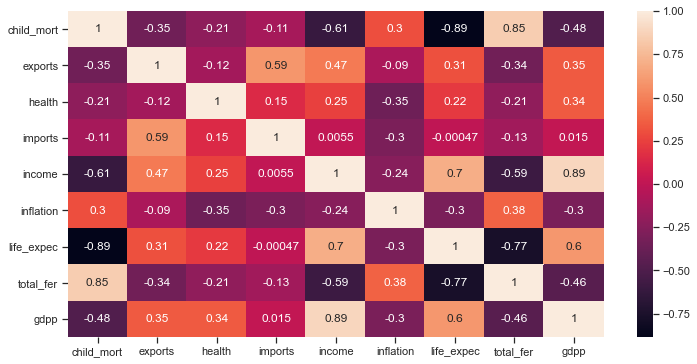

In [24]:
plt.figure(figsize = (12,6))
sns.heatmap(ngo.corr(),annot=True)


## 8. Clusterring

In [25]:
# Assigning the ngo into new DF with out the ngo columns for performing clustering
clust_df = ngo.drop('country', axis = 1)

In [26]:
# Check the hopkins

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [27]:
# Check the hopkins:
for i in range(0,5):
    print(hopkins(ngo.drop('country', axis = 1)))


0.9163280665180492
0.9436124258030313
0.9113045858766808
0.9330579304229016
0.9480256782864032


### Since Hopins score is 0.89 to0.94 we proceed ahead with clustering 

### 8.1. Scaling

In [28]:
# we will use the Standard Scaler to scale the feature variable to fit into the algorithm
scaler = StandardScaler()
scaled_df = scaler.fit_transform(clust_df)
scaled_df




array([[1.291532, -1.410006, 0.320006, ..., -1.619092, 1.955837,
        -0.679180],
       [-0.538949, -0.545996, -0.079938, ..., 0.647866, -0.870487,
        -0.485623],
       [-0.272833, -0.046790, -1.004080, ..., 0.670423, -0.030045,
        -0.465376],
       ...,
       [-0.372315, 1.566028, 0.032668, ..., 0.286958, -0.667154,
        -0.637754],
       [0.448417, -0.449995, -0.611902, ..., -0.344633, 1.176395,
        -0.637754],
       [1.114951, -0.113991, -0.336212, ..., -2.092785, 1.671171,
        -0.629546]])

In [29]:
# assigning back the scalled array values into scaled_df as dataframe
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()


,0,1,2,3,4,5,6,7,8
0,1.2915,-1.4100,0.3200,-0.0358,-0.9583,0.3598,-1.6191,1.9558,-0.6792
1,-0.5389,-0.5460,-0.0799,0.1529,-0.3940,-0.3851,0.6479,-0.8705,-0.4856
2,-0.2728,-0.0468,-1.0041,-0.7243,-0.1926,1.3622,0.6704,-0.0300,-0.4654
3,2.0078,1.1004,-1.5166,-0.1378,-0.6674,2.3103,-1.1792,2.1863,-0.5163
4,-0.6956,0.2940,-0.2819,0.6782,0.2280,-0.8442,0.7043,-0.5452,-0.0418


## 9. Model building

## K MEANS

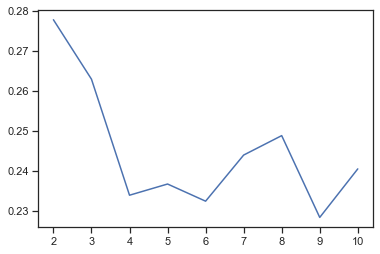

In [30]:
#finding the silhouette_score for the scaled_df
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])


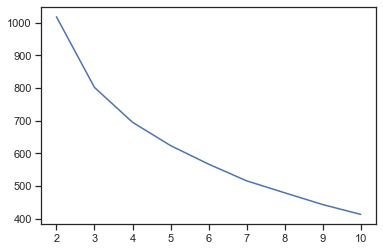

In [60]:
# finding the Elbow curve-ssd for the k value
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1]) 


In [31]:
# we will use K=3 for the initial iteration
# fitting the Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(scaled_df)


KMeans(n_clusters=3, random_state=100)

In [32]:
# we will use K=3 for the initial iteration
# fitting the Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(scaled_df)


KMeans(n_clusters=3, random_state=100)

In [33]:
# Creating new dataframe for the final Df with Kmeans labels
df_kmean = ngo.copy()
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200


In [34]:
# Lets check the labels from Kmeans
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()


,label
0,2
1,1
2,1
3,2
4,1


In [35]:
# Since we have to Kmeans label, we will concat the label into the final Kmeans DF for further analysis
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090,1
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460,1
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200,1


In [36]:
# Checking the value counts of eeach labels created
df_kmean.label.value_counts()


1    83
2    47
0    37
Name: label, dtype: int64

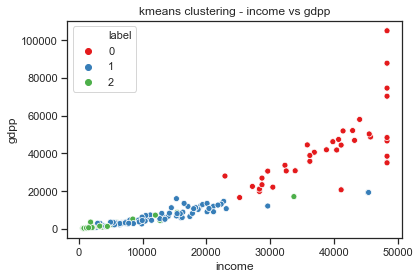

In [37]:
# Plotting the cluster
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('kmeans clustering - income vs gdpp')
plt.show()


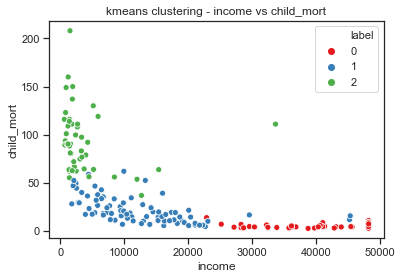

In [38]:
# Plot the cluster
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('kmeans clustering - income vs child_mort')
plt.show()


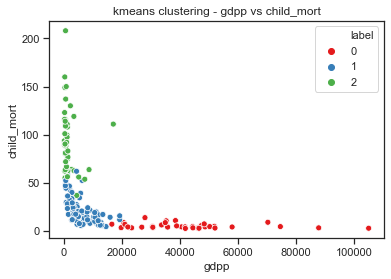

In [39]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('kmeans clustering - gdpp vs child_mort')
plt.show()


## 9.2 Cluster Profiling

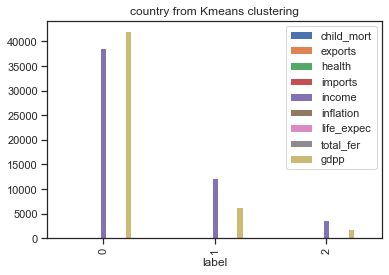

In [40]:
# Making sense out of the clsuters
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.title('country from Kmeans clustering')
plt.show()


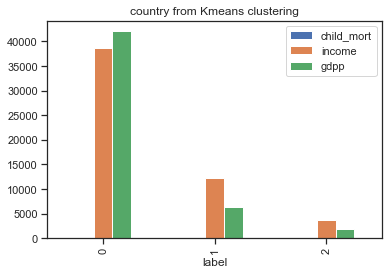

In [41]:
# GDP, INCOME AND CHID_MORT
df_kmean.drop(['country', 'inflation', 'total_fer', 'life_expec','inflation', 'exports','health','imports'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.title('country from Kmeans clustering')
plt.show()


In [42]:
# Filter the data from that clsuter label 2
df_kmean[df_kmean['label'] == 2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553,2
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530,2
17,Benin,111.0000,23.8000,4.1000,37.2000,1820.0000,0.8850,61.8000,5.3600,758,2
25,Burkina Faso,116.0000,19.2000,6.7400,29.6000,1430.0000,6.8100,57.9000,5.8700,575,2
26,Burundi,93.6000,8.9200,11.6000,39.2000,764.0000,12.3000,57.7000,6.2306,231,2
28,Cameroon,108.0000,22.2000,5.1300,27.0000,2660.0000,1.9100,57.3000,5.1100,1310,2
31,Central African Republic,149.0000,11.8000,3.9800,26.5000,888.0000,2.0100,47.5000,5.2100,446,2
32,Chad,150.0000,36.8000,4.5300,43.5000,1930.0000,6.3900,56.5000,6.2306,897,2
36,Comoros,88.2000,16.5000,4.5100,51.7000,1410.0000,3.8700,65.9000,4.7500,769,2
37,"Congo, Dem. Rep.",116.0000,41.1000,7.9100,49.6000,609.0000,20.8000,57.5000,6.2306,334,2


In [43]:
# filtering the the top 5 countries those have less gdp, income & high child_mort
df_kmean[df_kmean['label'] == 2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6000,8.9200,11.6000,39.2000,764.0000,12.3000,57.7000,6.2306,231,2
88,Liberia,89.3000,19.1000,11.8000,92.6000,700.0000,5.4700,60.8000,5.0200,327,2
37,"Congo, Dem. Rep.",116.0000,41.1000,7.9100,49.6000,609.0000,20.8000,57.5000,6.2306,334,2
112,Niger,123.0000,22.2000,5.1600,49.1000,814.0000,2.5500,58.8000,6.2306,348,2
132,Sierra Leone,160.0000,16.8000,11.8020,34.5000,1220.0000,17.2000,55.0000,5.2000,399,2


In [44]:
# filtering the the top 5 countries those have less gdp, income & high child_mort
df_kmean[df_kmean['label'] == 2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6000,8.9200,11.6000,39.2000,764.0000,12.3000,57.7000,6.2306,231,2
88,Liberia,89.3000,19.1000,11.8000,92.6000,700.0000,5.4700,60.8000,5.0200,327,2
37,"Congo, Dem. Rep.",116.0000,41.1000,7.9100,49.6000,609.0000,20.8000,57.5000,6.2306,334,2
112,Niger,123.0000,22.2000,5.1600,49.1000,814.0000,2.5500,58.8000,6.2306,348,2
132,Sierra Leone,160.0000,16.8000,11.8020,34.5000,1220.0000,17.2000,55.0000,5.2000,399,2


In [45]:
# filtering & assigning the the top 5 countries those have less gdp, income & high child_mort into new DF:
kmeans_Top_5_countries = df_kmean[df_kmean['label'] == 2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)

kmeans_Top_5_countries.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6000,8.9200,11.6000,39.2000,764.0000,12.3000,57.7000,6.2306,231,2
88,Liberia,89.3000,19.1000,11.8000,92.6000,700.0000,5.4700,60.8000,5.0200,327,2
37,"Congo, Dem. Rep.",116.0000,41.1000,7.9100,49.6000,609.0000,20.8000,57.5000,6.2306,334,2
112,Niger,123.0000,22.2000,5.1600,49.1000,814.0000,2.5500,58.8000,6.2306,348,2
132,Sierra Leone,160.0000,16.8000,11.8020,34.5000,1220.0000,17.2000,55.0000,5.2000,399,2


In [46]:
# filtering only the required columns for better lookup
kmeans_Top_5_countries[['country','income','gdpp','child_mort']]


,country,income,gdpp,child_mort
26,Burundi,764.0000,231,93.6000
88,Liberia,700.0000,327,89.3000
37,"Congo, Dem. Rep.",609.0000,334,116.0000
112,Niger,814.0000,348,123.0000
132,Sierra Leone,1220.0000,399,160.0000


### Kmeans Clustering Conclusion:¶
### Based the solution critria mentioned/discussed above the top 5 countries ### that needs priority of support from the NGO are listed bellow:
### 1.	Burundi
### 2.	Liberia
### 3.	Congo, Dem. Rep.
### 4.	Niger
### 5.	Sierra Leone



In [47]:
# verifing the Scalled DF
scaled_df.head()


,0,1,2,3,4,5,6,7,8
0,1.2915,-1.4100,0.3200,-0.0358,-0.9583,0.3598,-1.6191,1.9558,-0.6792
1,-0.5389,-0.5460,-0.0799,0.1529,-0.3940,-0.3851,0.6479,-0.8705,-0.4856
2,-0.2728,-0.0468,-1.0041,-0.7243,-0.1926,1.3622,0.6704,-0.0300,-0.4654
3,2.0078,1.1004,-1.5166,-0.1378,-0.6674,2.3103,-1.1792,2.1863,-0.5163
4,-0.6956,0.2940,-0.2819,0.6782,0.2280,-0.8442,0.7043,-0.5452,-0.0418


## 10. Hirerachial clustering

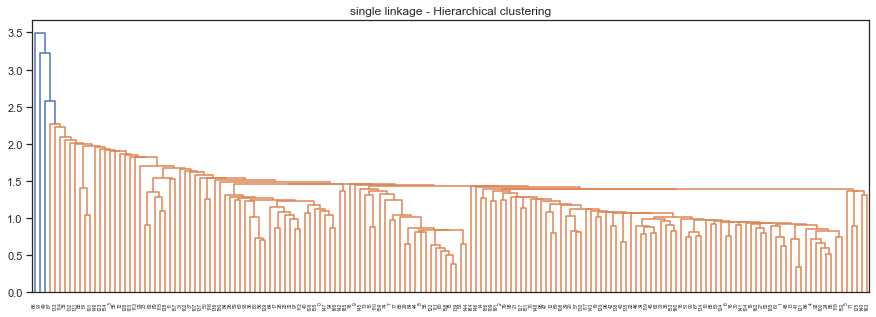

In [48]:
# single linkage
mergings = linkage(scaled_df, method="single", metric='euclidean')
plt.figure(figsize=(15,5))
dendrogram(mergings)
plt.title('single linkage - Hierarchical clustering')
plt.show()


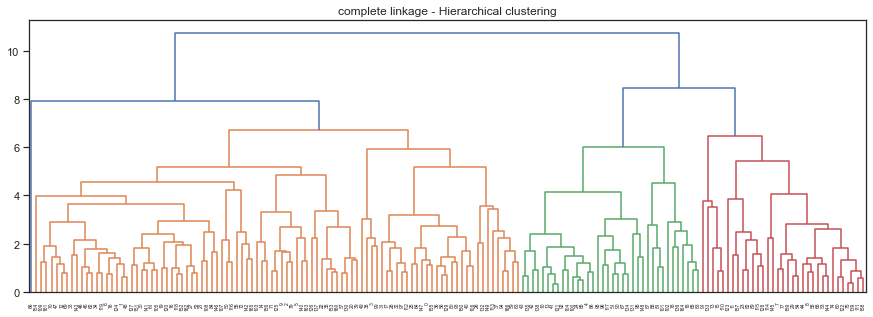

In [49]:
# complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
plt.figure(figsize=(15,5))
dendrogram(mergings)
plt.title('complete linkage - Hierarchical clustering')
plt.show()


In [50]:
# cutting the tree for 3 clusters from the complete linkage:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels


array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0])

In [51]:
# creating new DF to merge the cluster labels & country data set
df_Hierarchical = ngo.copy()
df_Hierarchical.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200


In [52]:
# assigning the cluster labels to the new DF
df_Hierarchical['cluster_labels'] = cluster_labels
df_Hierarchical.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553,0
1,Albania,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,62.3000,2.8500,42.9000,5900.0000,22.4000,60.1000,6.1600,3530,0
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200,1


In [53]:
# checking the labels value count 
df_Hierarchical['cluster_labels'].value_counts()


0    98
1    36
2    33
Name: cluster_labels, dtype: int64

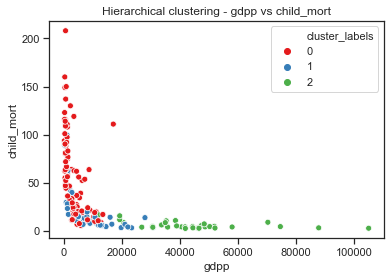

In [54]:
# Plot the cluster
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = df_Hierarchical, palette = 'Set1')
plt.title('Hierarchical clustering - gdpp vs child_mort')
plt.show()


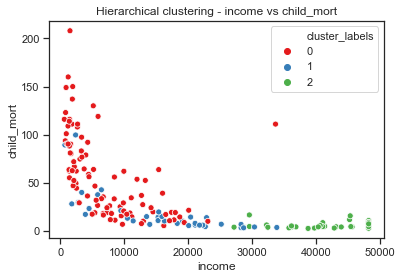

In [55]:
# Plot the cluster
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = df_Hierarchical, palette = 'Set1')
plt.title('Hierarchical clustering - income vs child_mort')
plt.show()


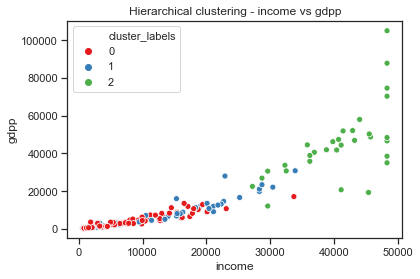

In [56]:
# Plot the cluster
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_labels', data = df_Hierarchical, palette = 'Set1')
plt.title('Hierarchical clustering - income vs gdpp')
plt.show()


## 11. Cluster Profiling

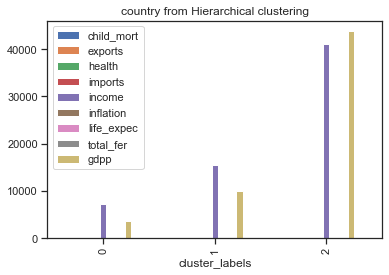

In [57]:
# Making sense out of the clusters
df_Hierarchical.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.title('country from Hierarchical clustering')
plt.show()

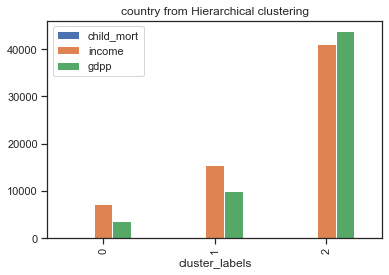

In [58]:
# GDP, INCOME AND CHID_MORT
df_Hierarchical.drop(['country', 'inflation', 'total_fer', 'life_expec','inflation', 'exports','health','imports'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.title('country from Hierarchical clustering')
plt.show()


In [59]:
# filtering the top 5 countries based on the less gdpp, income & child_mort from cluster label 0:
df_Hierarchical[df_Hierarchical['cluster_labels'] == 0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6000,8.9200,11.6000,39.2000,764.0000,12.3000,57.7000,6.2306,231,0
37,"Congo, Dem. Rep.",116.0000,41.1000,7.9100,49.6000,609.0000,20.8000,57.5000,6.2306,334,0
112,Niger,123.0000,22.2000,5.1600,49.1000,814.0000,2.5500,58.8000,6.2306,348,0
132,Sierra Leone,160.0000,16.8000,11.8020,34.5000,1220.0000,17.2000,55.0000,5.2000,399,0
93,Madagascar,62.2000,25.0000,3.7700,43.0000,1390.0000,8.7900,60.8000,4.6000,413,0
